In [1]:
from BLEanalysis.pathinference import Path
from BLEanalysis.kernels import ExponentiatedQuadraticKernel as EQKernel
from BLEanalysis.synthetic import SimpleDemo

2025-04-28 09:08:49.537902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745827729.556002   18319 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745827729.561591   18319 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745827729.574208   18319 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745827729.574224   18319 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745827729.574226   18319 computation_placer.cc:177] computation placer alr

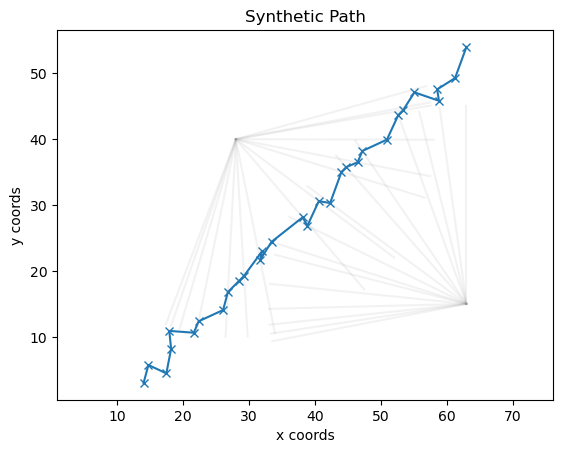

In [2]:
demo = SimpleDemo()
demo.plot()

In [3]:
inferredPath = Path(demo.obstimes, demo.observations, kernel = EQKernel(lengthscale = 5,scalefactor = 50), 
                    noiseScale=0.2, numberOfInducingPoints=7)
inferredPath.run(400,0.3)


Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


2025-04-28 09:08:52.876244: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


At iteration:      0, loss is:    581039
At iteration:     50, loss is:    189911
At iteration:    100, loss is:     51273
At iteration:    150, loss is:     13642
At iteration:    200, loss is:      5475
At iteration:    250, loss is:      3592
At iteration:    300, loss is:      2940
At iteration:    350, loss is:      2679
Training successful!


In [4]:
mu, cov = inferredPath.predict(Xs=inferredPath.selectPoints(100,margin=1))

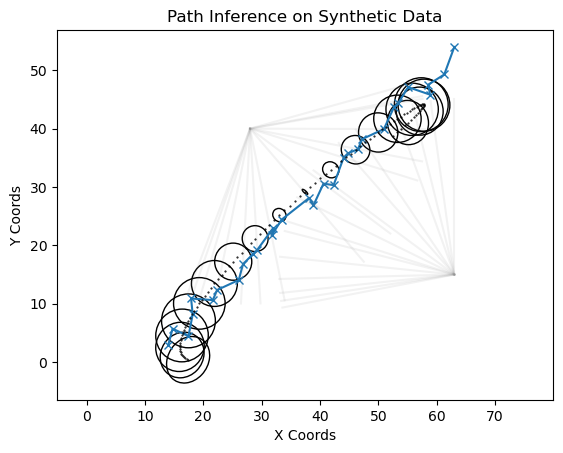

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from BLEanalysis import confidence_ellipse
demo.plot()
ax = plt.gca()
for i,(m,c) in enumerate(zip(mu.numpy(),cov.numpy())):
    std = max(np.sqrt(c[0,0]),np.sqrt(c[1,1]))
    ax.plot(m[0],m[1],'.k',markersize=1)

    if i%5==0:
        el = confidence_ellipse(m[:2],c[:2,:2],ax)
        ax.add_patch(el)
plt.xlabel("X Coords")
plt.ylabel("Y Coords")
plt.title("Path Inference on Synthetic Data")
plt.show()

In [9]:
fr
fname = '../4TransmitterTrialResults/bluetooth_experiments-main-5/no rf amp experiments/noamploc2long.log'

In [206]:
sigs = Signals("noamploc2long.log",angleOffset = 38) #TODO Why is this minus here, but + in your code?

In [207]:
avgRSSIs = sigs.averageRSSIsAtAngle('d')

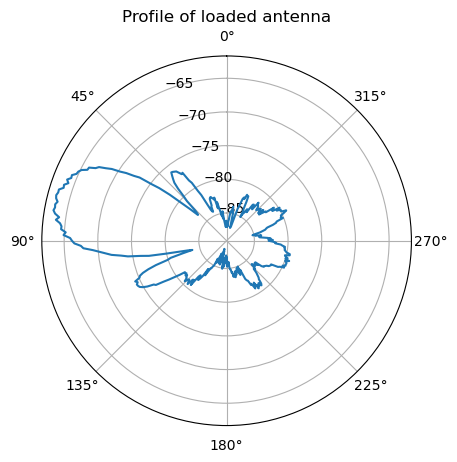

In [208]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
plt.plot(avgRSSIs[:, 0], avgRSSIs[:, 1])
plt.title("Profile of loaded antenna");